In [64]:
# imports
import pandas as pd
import numpy as np
from helpers import select_entries, clean_categories
import seaborn as sns
import matplotlib.pyplot as plt
import pygal  

In [2]:
data_folder = "./data/"

In [3]:
france = pd.read_csv(data_folder + 'france_data.csv')
usa = pd.read_csv(data_folder + 'us_data.csv')

# Category: Snacks

First we select all rows that is associated with snacks. Then we clean out the category to smaller categories.

In [4]:
snacks = [
    'snack', 'bar', 'ice cream', 'chips', 'popcorn', 'cake', 'cookie', 'choco', 'sugary', 'salty'
]

In [5]:
snacks_france = select_entries(france, snacks)
snacks_usa = select_entries(usa, snacks)

In [6]:
print("There are %d entries that are classified as snacks for France." % len(snacks_france))
print("There are %d entries that are classified as snacks for USA." % len(snacks_usa))

There are 22503 entries that are classified as snacks for France.
There are 31544 entries that are classified as snacks for USA.


## Sugary snacks

We create one category called `sugary_snacks`. This category will have all snacks defined as sugary and not salty. Then we will devide this category in smaller categories. We also create a dataframe to be used when calculating the distribution.

In [7]:
sugary = [
    'choco', 'coco', 'cookie', 'candy', 'candies', 'candi', 'bonbon', 'fudge', 'caramel', 'bar', 'nougat',
    'sugar', 'sucr', 'cake', 'gâteux', 'ice cream'
]

In [8]:
sugary_snacks_france = select_entries(snacks_france, sugary)
sugary_snacks_usa = select_entries(snacks_usa, sugary)

In [9]:
not_sugary_snacks = [
    'popcorn', 'chips', 'patate', 'potato', 'Snacks salés'
]
not_sugary_snacks_ingredients = ['patate', 'salé', 'salt']

In [10]:
sugary_snacks_france = clean_categories(sugary_snacks_france, not_sugary_snacks, not_sugary_snacks_ingredients)
sugary_snacks_usa = clean_categories(sugary_snacks_usa, not_sugary_snacks, not_sugary_snacks_ingredients)

In [11]:
print("Number of sugary snacks in France: %d" % len(sugary_snacks_france))
print("Number of sugary snacks in USA: %d" % len(sugary_snacks_usa))

Number of sugary snacks in France: 18268
Number of sugary snacks in USA: 11177


In [12]:
sugary_snacks_distr = pd.DataFrame(columns = ['category', 'count', 'country'])

The category contains a lot of rows. We will divide the category into sub-categories `chocolates`, `bars`, `candy` and `cookies`. We start with chocolates.

In [13]:
chocolate = [
    'chocolate', 'chocolat', 'choco', 'cacao', 'coco'
]

In [14]:
chocolates_france = select_entries(sugary_snacks_france, chocolate)
chocolates_usa = select_entries(sugary_snacks_usa, chocolate)

Looking at the frames we do not find any values that clearly should not be there and therefore we skip cleaning the category.

In [15]:
print("Sugary snacks that are made with chocolate in France: %d" % len(chocolates_france))
print("Sugary snacks that are made with chocolate in USA: %d" % len(chocolates_usa))

Sugary snacks that are made with chocolate in France: 10809
Sugary snacks that are made with chocolate in USA: 5742


In [16]:
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['chocolates', len(chocolates_france), 'France']], columns=['category', 'count', 'country'])
)
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['chocolates', len(chocolates_usa), 'USA']], columns=['category', 'count', 'country'])
)

We then move forward to `bars`.

In [17]:
bars = ['bar', 'bars']

In [18]:
bars_france = select_entries(sugary_snacks_france, bars)
bars_usa = select_entries(sugary_snacks_usa, bars)

We look at the dataframes to decide what should not be classified as bars and then remove based on words that are not associated with bars. Note that we keep all bars that are made with chocolate even though these are also in the `chocolates` category.

In [19]:
not_bars = ['barbecue', 'rhubarb', 'barbe', 'baratte', 'barley']

In [20]:
bars_france = clean_categories(bars_france, not_bars)
bars_usa = clean_categories(bars_usa, not_bars)

In [21]:
print('Number of bars in France: %d' % len(bars_france))
print('Number of bars in the USA: %d' % len(bars_usa))

Number of bars in France: 2251
Number of bars in the USA: 2261


In [22]:
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['bars', len(bars_france), 'France']], columns=['category', 'count', 'country'])
)
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['bars', len(bars_usa), 'USA']], columns=['category', 'count', 'country'])
)

Next up is `candy`.

In [23]:
candy = [
    'candy', 'candies', 'bonbon', 'candi', 'confectioneries', 'pastilles', 'mints', 'caramels', 'gummies',
    'lollipop'
]

In [24]:
candy_france = select_entries(sugary_snacks_france, candy)
candy_usa = select_entries(sugary_snacks_usa, candy)

Looking at the frames no values seem to be out of place.

In [25]:
print("Rows classified as candy in France: %d" % len(candy_france))
print("Rows classified as candy in the USA: %d" % len(candy_usa))

Rows classified as candy in France: 1938
Rows classified as candy in the USA: 419


In [26]:
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['candy', len(candy_france), 'France']], columns=['category', 'count', 'country'])
)
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['candy', len(candy_usa), 'USA']], columns=['category', 'count', 'country'])
)

Lastly we create the category `cookies`.

In [27]:
cookies_france = select_entries(sugary_snacks_france, ['cookie', 'biscuit'])
cookies_usa = select_entries(sugary_snacks_usa, ['cookie', 'biscuit'])

In [28]:
not_cookies = [
    'brownie', 'muffin', 'candy', 'candies', 'candi', 'kit kat', 'tourteaux fromagés', 'gaufres', 'gâteau à la',
    'cakes ', 'fondants ', 'pancake', 'ice cream'
]

In [29]:
cookies_france = clean_categories(cookies_france, not_cookies)
cookies_usa = clean_categories(cookies_usa, not_cookies)

In [30]:
print("Number of cookies in France: %d" % len(cookies_france))
print("Number of cookies in USA: %d" % len(cookies_usa))

Number of cookies in France: 4239
Number of cookies in USA: 1822


In [31]:
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['cookies', len(cookies_france), 'France']], columns=['category', 'count', 'country'])
)
sugary_snacks_distr = sugary_snacks_distr.append(
    pd.DataFrame([['cookies', len(cookies_usa), 'USA']], columns=['category', 'count', 'country'])
)

## Salty snacks

The second big category will be `salty_snacks`. We will then divide this category into smaller categories.

In [32]:
salty = [
    'salt', 'salé', 'chips', 'popcorn', 'sodium', 'crisps'
]

In [33]:
salty_snacks_france = select_entries(snacks_france, salty)
salty_snacks_usa = select_entries(snacks_usa, salty)

In [34]:
not_salty = [
    'sucr', 'sugar', 'cake', 'caramel'
]

In [35]:
salty_snacks_france = clean_categories(salty_snacks_france, not_salty)
salty_snacks_usa = clean_categories(salty_snacks_usa, not_salty)

In [36]:
print("Number of salty snacks in France: %d" % len(salty_snacks_france))
print("Number of salty snacks in USA: %d" % len(salty_snacks_usa))

Number of salty snacks in France: 2699
Number of salty snacks in USA: 5692


In [37]:
salty_snacks_distr = pd.DataFrame(columns = ['category', 'count', 'country'])

We divide the category into `chips` and `popcorn`, starting out with `chips`.

In [38]:
chips_france = select_entries(salty_snacks_france, ['chips', 'crisps'])
chips_usa = select_entries(salty_snacks_usa, ['chips', 'crisps'])

In [39]:
print("Number of chips in France: %d" % len(chips_france))
print("Number of chips in USA: %d" % len(chips_usa))

Number of chips in France: 1574
Number of chips in USA: 4102


In [40]:
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['chips', len(chips_france), 'France']], columns=['category', 'count', 'country'])
)
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['chips', len(chips_usa), 'USA']], columns=['category', 'count', 'country'])
)

We then proceed to `popcorn`.

In [41]:
popcorn_france = select_entries(salty_snacks_france, ['popcorn'])
popcorn_usa = select_entries(salty_snacks_usa, ['popcorn'])

In [42]:
print("Number of popcorn in France: %d" % len(popcorn_france))
print("Number of popcorn in USA: %d" % len(popcorn_usa))

Number of popcorn in France: 102
Number of popcorn in USA: 1110


In [43]:
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['popcorn', len(popcorn_france), 'France']], columns=['category', 'count', 'country'])
)
salty_snacks_distr = salty_snacks_distr.append(
    pd.DataFrame([['popcorn', len(popcorn_usa), 'USA']], columns=['category', 'count', 'country'])
)

# Distribution of snacks

We start by creating dataframes for both sugary and salty snacks.

In [44]:
sugary_snacks_distr['procent'] = sugary_snacks_distr['count'].apply(
    lambda x: x/sugary_snacks_distr['count'].sum()
)

In [45]:
salty_snacks_distr['procent'] = salty_snacks_distr['count'].apply(
    lambda x: x/salty_snacks_distr['count'].sum()
)

In [46]:
salty_snacks_distr

,category,count,country,procent
0,chips,1574,France,0.228513
0,chips,4102,USA,0.595528
0,popcorn,102,France,0.014808
0,popcorn,1110,USA,0.161150


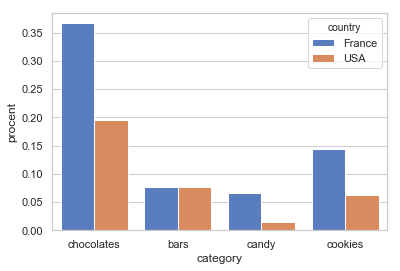

In [47]:
sns.set(style="whitegrid")

g = sns.barplot(x='category', y="procent", hue="country", data=sugary_snacks_distr, palette="muted")

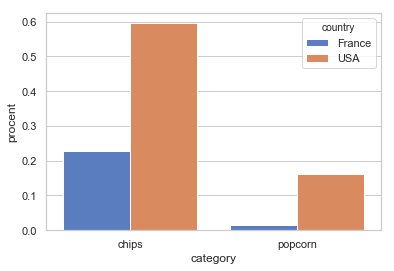

In [48]:
sns.set(style="whitegrid")

g = sns.barplot(x='category', y="procent", hue="country", data=salty_snacks_distr, palette="muted")

In [49]:
sugary_france_distr = sugary_snacks_distr[sugary_snacks_distr.country == 'France']
sugary_usa_distr = sugary_snacks_distr[sugary_snacks_distr.country == 'USA']
salty_france_distr = salty_snacks_distr[salty_snacks_distr.country == 'France']
salty_usa_distr = salty_snacks_distr[salty_snacks_distr.country == 'USA']

In [50]:
bar_chart_distri = pygal.Bar()
bar_chart_distri.title = 'Distribution within sugary snacks'
bar_chart_distri.x_labels = list(sugary_snacks_distr.category.unique())
bar_chart_distri.add('France', sugary_france_distr['procent'], formatter=lambda y: "{0:.2f}".format(y))
bar_chart_distri.add('USA', sugary_usa_distr['procent'], formatter=lambda y: "{0:.2f}".format(y))
bar_chart_distri.render_to_file('sugary_snacks_distribution.svg')  

In [51]:
bar_chart_distri2 = pygal.Bar()
bar_chart_distri2.title = 'Distribution within salty snacks'
bar_chart_distri2.x_labels = list(salty_snacks_distr.category.unique())
bar_chart_distri2.add('France', salty_france_distr['procent'], formatter=lambda y: "{0:.2f}".format(y))
bar_chart_distri2.add('USA', salty_usa_distr['procent'], formatter=lambda y: "{0:.2f}".format(y))
bar_chart_distri2.render_to_file('salty_snacks_distribution.svg')  

# Nutrition

We'll start by looking at the sugar content in `sugary_snacks`.

In [189]:
france_nutrition = sugary_snacks_france[['sugars_100g','energy_100g',
'carbohydrates_100g']].astype(float).replace({0.0:np.nan})
usa_nutrition = sugary_snacks_usa[['sugars_100g','energy_100g',
'carbohydrates_100g']].astype(float).replace({0.0:np.nan})

In [77]:
box_chart = pygal.Box()
box_chart.title = 'Sugar per 100g'
box_chart.add('France', france_nutrition['sugars_100g'].dropna())
box_chart.add('USA', usa_nutrition['sugars_100g'].dropna())
box_chart.render_to_file('snacks_sugars.svg')  

In [78]:
box_chart = pygal.Box()
box_chart.title = 'Energy per 100g'
box_chart.add('France', france_nutrition['energy_100g'].dropna())
box_chart.add('USA', usa_nutrition['energy_100g'].dropna())
box_chart.render_to_file('snacks_sugary_energy.svg')  

The result is hard to see because we have outliers. We will remove these for this visualisation to see the distribution clearly.

In [79]:
france_nutrition_cleaned = france_nutrition.copy()
usa_nutrition_cleaned = usa_nutrition.copy()

In [80]:
mask_max_f = france_nutrition_cleaned.energy_100g > 3000
france_nutrition_cleaned.loc[mask_max_f, 'energy_100g'] = np.nan
mask_max_u = usa_nutrition_cleaned.energy_100g > 3000
usa_nutrition_cleaned.loc[mask_max_u, 'energy_100g'] = np.nan

Removing outliers gives a plot that more clearly shows the distribution in the countries.

In [81]:
box_chart = pygal.Box()
box_chart.title = 'Energy per 100g'
box_chart.add('France', france_nutrition_cleaned['energy_100g'].dropna())
box_chart.add('USA', usa_nutrition_cleaned['energy_100g'].dropna())
box_chart.render_to_file('snacks_sugary_energy_cleaned.svg') 

We try another way, by using a histogram instead without removing the outliers.

In [204]:
hist, bin_edges = np.histogram(france_nutrition.energy_100g.dropna(), density=True)
a = pd.cut(france_nutrition.energy_100g.dropna(), np.insert(bin_edges, 0, 0))

In [179]:
bin_edges = np.sort(bin_edges)

In [181]:
bins = list(zip(a.value_counts().sort_index(), np.insert(bin_edges[:-1], 0, 0), bin_edges))

In [194]:
hista = pygal.Histogram()
hista.title = 'Energy per 100g'
hista.add('France', bins)
hista.render_to_file('snacks_sugary_energy_histogram.svg') 

In [217]:
hist, bin_edges2 = np.histogram(usa_nutrition.energy_100g.dropna(), density=True)
b = pd.cut(usa_nutrition.energy_100g.dropna(), np.insert(bin_edges2, 0, 0))

In [215]:
chart = pygal.StackedLine(fill=True)
chart.add('USA', b.value_counts().sort_index())
#chart.add('France', a.value_counts().sort_index())
chart.render_to_file('sugary_snacks_energy_lines.svg')

In [218]:
b.value_counts()

(2.35, 23122.015]          10938
(208079.335, 231199.0]         1
(46241.68, 69361.345]          1
(23122.015, 46241.68]          1
(0.0, 2.35]                    1
(184959.67, 208079.335]        0
(161840.005, 184959.67]        0
(138720.34, 161840.005]        0
(115600.675, 138720.34]        0
(92481.01, 115600.675]         0
(69361.345, 92481.01]          0
Name: energy_100g, dtype: int64